In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_long = pd.read_csv('df_long.csv')
df_delta=pd.read_csv('df_delta.csv')

--- TABLA 1: PROMEDIOS GENERALES (E.S) ---
           count   mean    std
Condicion                     
CON          121  0.386  0.268
SIN          121  0.390  0.288
DIST         121  0.355  0.258

--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---
Mantiene    0   1  %_Mantiene
Condicion                    
CON        80  42       34.43
SIN        70  52       42.62
DIST       79  43       35.25

--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---
count     121.000
mean       -0.004
std         0.211
median      0.000
min        -1.000
max         0.667
Name: Delta_Mantiene, dtype: float64


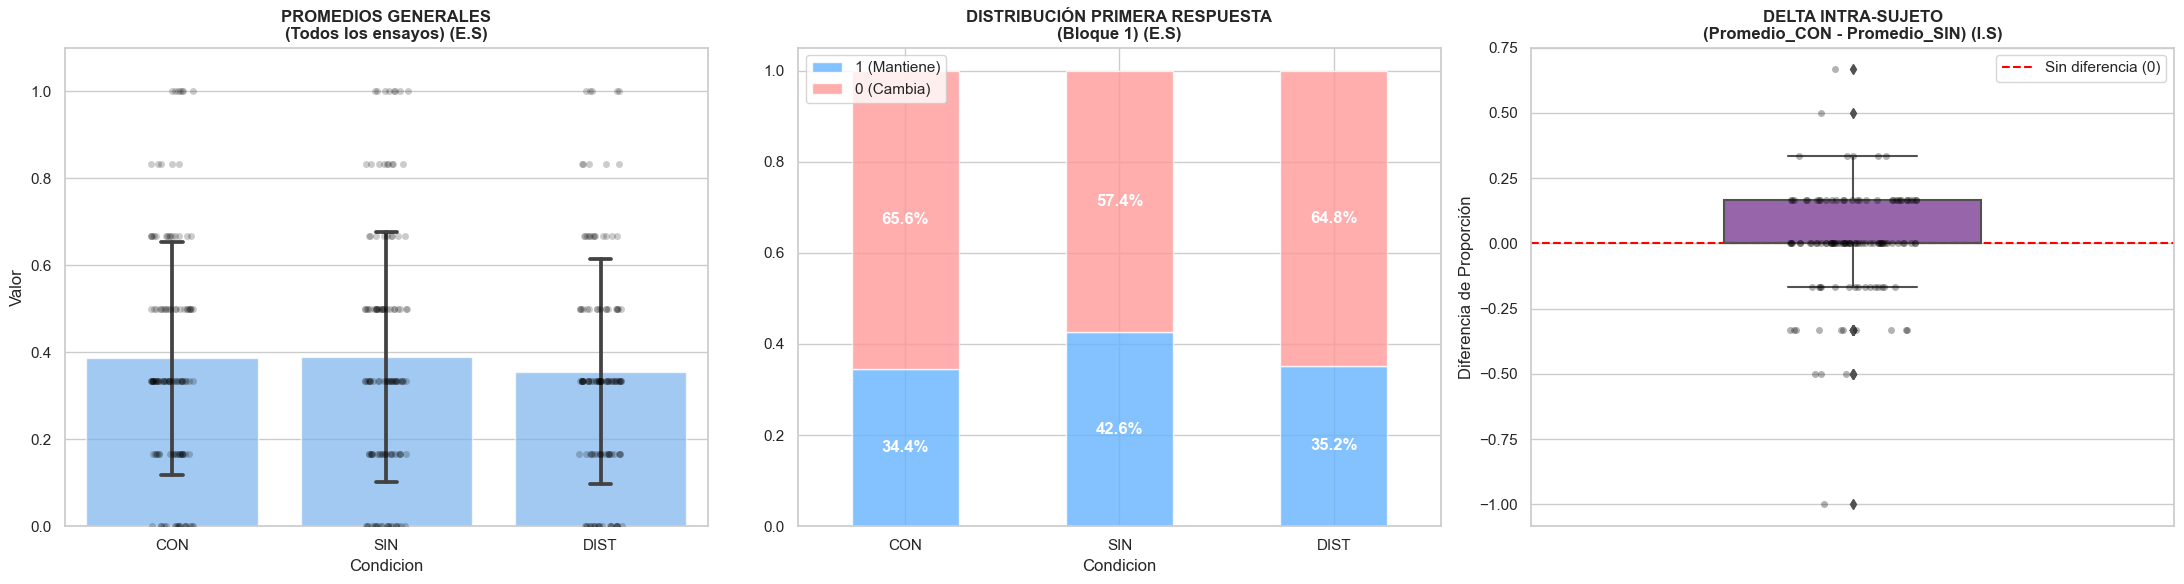

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS ---

# A. Para el gráfico de PROMEDIOS GENERALES
df_unicos = df.drop_duplicates(subset=['ID_Sujeto']).copy()
df_proms = df_unicos.melt(id_vars='ID_Sujeto', 
                          value_vars=['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST'],
                          var_name='Condicion', value_name='Valor')
df_proms['Condicion'] = df_proms['Condicion'].str.replace('Promedio_', '')

# B. Para el gráfico de PRIMERA RESPUESTA (Categoría 1)
df_cat1 = df[df['Categoria'] == 1].copy()
def mapear(n):
    n = str(n).upper()
    return 'CON' if 'CON' in n else 'SIN' if 'SIN' in n else 'DIST' if 'DIST' in n else n
df_cat1['Condicion'] = df_cat1['Dilema'].apply(mapear)

# C. Cálculo del DELTA (CON - SIN)
df_unicos['Delta_Mantiene'] = df_unicos['Promedio_CON'] - df_unicos['Promedio_SIN']

orden = ['CON', 'SIN', 'DIST']

# --- 2. GENERACIÓN DE TABLAS (Sin cambios en contenido) ---

print("--- TABLA 1: PROMEDIOS GENERALES (E.S) ---")
t1 = df_proms.groupby('Condicion')['Valor'].agg(['count', 'mean', 'std']).loc[orden]
print(t1.round(3))

print("\n--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---")
t2 = pd.crosstab(df_cat1['Condicion'], df_cat1['Mantiene']).loc[orden]
t2['%_Mantiene'] = (t2[1] / (t2[0] + t2[1]) * 100).round(2)
print(t2)

print("\n--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---")
resumen_delta = df_unicos['Delta_Mantiene'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
print(resumen_delta.round(3))

# --- 3. VISUALIZACIÓN (Panel de 3 gráficos) ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6)) # Aumentamos el ancho total
colores_apilado = ['#66b3ff', '#ff9999']

# GRÁFICO 1: PROMEDIOS GENERALES
sns.barplot(data=df_proms, x='Condicion', y='Valor', order=orden,
            errorbar='sd', capsize=.1, color='#66b3ff', alpha=0.7, ax=ax1)
sns.stripplot(data=df_proms, x='Condicion', y='Valor', order=orden,
              color='black', alpha=0.2, ax=ax1)
ax1.set_title('PROMEDIOS GENERALES\n(Todos los ensayos) (E.S)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.1)

# GRÁFICO 2: DISTRIBUCIÓN APILADA (Primera Respuesta)
tab_prop = df_cat1.groupby('Condicion')['Mantiene'].value_counts(normalize=True).unstack()
tab_prop[[1, 0]].loc[orden].plot(kind='bar', stacked=True, color=colores_apilado, alpha=0.8, ax=ax2, rot=0)

for p in ax2.patches:
    h = p.get_height()
    if h > 0:
        ax2.annotate(f'{h:.1%}', (p.get_x() + p.get_width()/2, p.get_y() + h/2),
                     ha='center', va='center', color='white', fontweight='bold')
ax2.set_title('DISTRIBUCIÓN PRIMERA RESPUESTA\n(Bloque 1) (E.S)', fontsize=12, fontweight='bold')
ax2.legend(['1 (Mantiene)', '0 (Cambia)'], loc='upper left')

# GRÁFICO 3: BOXPLOT DEL DELTA (Diferencia Intra-Sujeto)
sns.boxplot(y=df_unicos['Delta_Mantiene'], color='#9b59b6', width=0.4, fliersize=5, ax=ax3)
sns.stripplot(y=df_unicos['Delta_Mantiene'], color='black', alpha=0.3, jitter=True, ax=ax3)
ax3.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Sin diferencia (0)')
ax3.set_title('DELTA INTRA-SUJETO\n(Promedio_CON - Promedio_SIN) (I.S)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Diferencia de Proporción')
ax3.legend()

plt.tight_layout()
plt.savefig('panel_completo_resultados.png', dpi=300)
plt.show()

--- TABLA 1: PROMEDIOS VS AZAR (0.5) ---
           count   mean    std  Diferencia_al_50%
Condicion                                        
CON          121  0.386  0.268             -0.114
SIN          121  0.390  0.288             -0.110
DIST         121  0.355  0.258             -0.145

--- TABLA 2: PRIMERA RESPUESTA VS AZAR (0.5) ---
Mantiene    0   1  Prop_Mantiene  Diferencia_al_50%
Condicion                                          
CON        80  42          0.344             -0.156
SIN        70  52          0.426             -0.074
DIST       79  43          0.352             -0.148


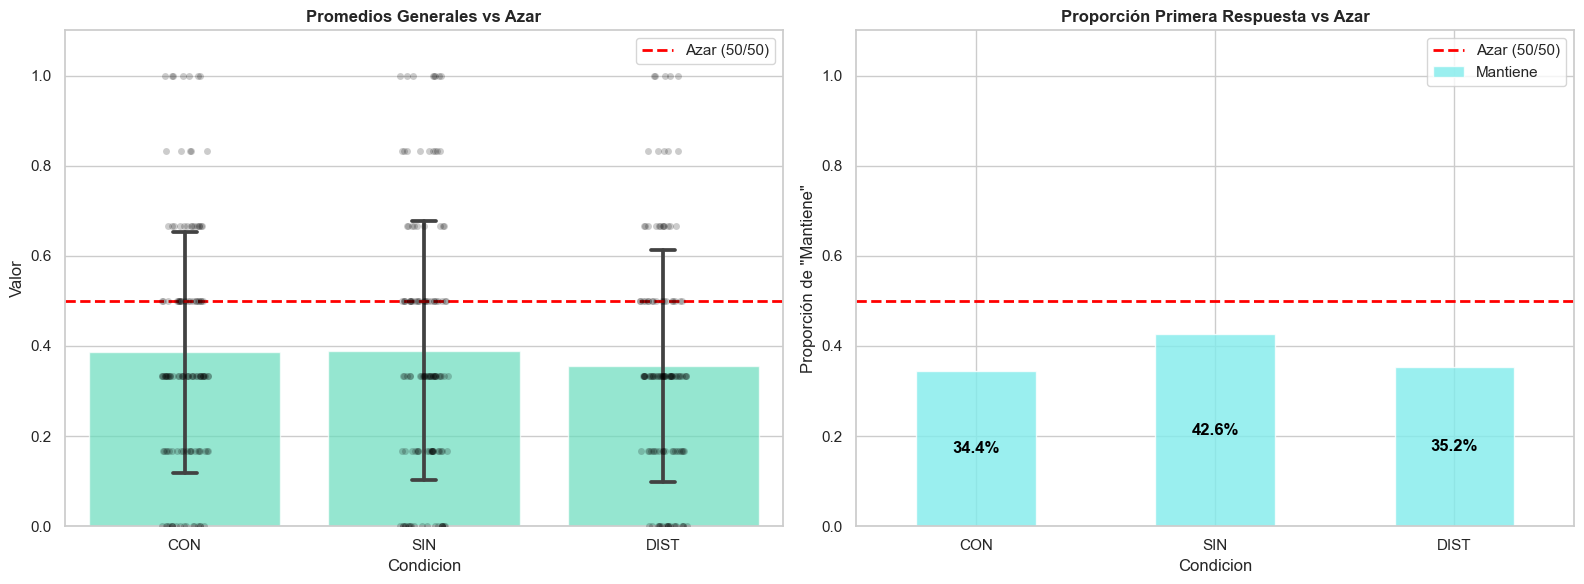

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS ---

# A. Para PROMEDIOS GENERALES
df_unicos = df.drop_duplicates(subset=['ID_Sujeto']).copy()
df_proms = df_unicos.melt(id_vars='ID_Sujeto', 
                          value_vars=['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST'],
                          var_name='Condicion', value_name='Valor')
df_proms['Condicion'] = df_proms['Condicion'].str.replace('Promedio_', '')

# B. Para PRIMERA RESPUESTA (Categoría 1)
df_cat1 = df[df['Categoria'] == 1].copy()
def mapear(n):
    n = str(n).upper()
    return 'CON' if 'CON' in n else 'SIN' if 'SIN' in n else 'DIST' if 'DIST' in n else n
df_cat1['Condicion'] = df_cat1['Dilema'].apply(mapear)

orden = ['CON', 'SIN', 'DIST']

# --- 2. GENERACIÓN DE TABLAS ---

print("--- TABLA 1: PROMEDIOS VS AZAR (0.5) ---")
t1 = df_proms.groupby('Condicion')['Valor'].agg(['count', 'mean', 'std']).loc[orden]
t1['Diferencia_al_50%'] = (t1['mean'] - 0.5).round(3)
print(t1.round(3))

print("\n--- TABLA 2: PRIMERA RESPUESTA VS AZAR (0.5) ---")
t2 = pd.crosstab(df_cat1['Condicion'], df_cat1['Mantiene']).loc[orden]
t2['Prop_Mantiene'] = (t2[1] / (t2[0] + t2[1])).round(3)
t2['Diferencia_al_50%'] = (t2['Prop_Mantiene'] - 0.5).round(3)
print(t2)

# --- 3. VISUALIZACIÓN ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# GRÁFICO 1: PROMEDIOS VS 50/50
sns.barplot(data=df_proms, x='Condicion', y='Valor', order=orden,
            errorbar='sd', capsize=.1, color='#55efc4', alpha=0.7, ax=ax1)
sns.stripplot(data=df_proms, x='Condicion', y='Valor', order=orden,
              color='black', alpha=0.2, ax=ax1)

# Línea de azar 50/50
ax1.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (50/50)')
ax1.set_title('Promedios Generales vs Azar', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.1)
ax1.legend()

# GRÁFICO 2: PRIMERA RESPUESTA VS 50/50
# Usamos un gráfico de barras simple para comparar proporciones
tab_prop = df_cat1.groupby('Condicion')['Mantiene'].mean().loc[orden]
tab_prop.plot(kind='bar', color='#81ecec', alpha=0.8, ax=ax2, rot=0)

# Añadir etiquetas de porcentaje
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width()/2, p.get_height()/2),
                 ha='center', va='center', color='black', fontweight='bold')

# Línea de azar 50/50
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (50/50)')
ax2.set_title('Proporción Primera Respuesta vs Azar', fontsize=12, fontweight='bold')
ax2.set_ylabel('Proporción de "Mantiene"')
ax2.set_ylim(0, 1.1)
ax2.legend()

plt.tight_layout()
plt.show()